TODOs:
1. Portfolio by sectors
2. Sector hedgings
3. Dynamic portfolio
4. Incidents

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import sys
sys.path.append('../../source/')

from Hedge import Hedge

In [4]:
from BetaUtils import beta_hedging_ret, get_beta
from energy_functions import correlation, neg_returns, neg_sharpe, volatility

In [7]:
portfolios = []
with open('./sim041102/portfolios.txt') as f:
    for i,line in enumerate(f):
        portfolios.append(line.split(',')[1:-1])

In [10]:
print portfolios[0]

['VSCP', 'FRME', 'CGNX', 'CTG', 'IVAC', 'MATR', 'FAST', 'FHCO', 'MEI', 'THC', 'IBKC', 'HNP', 'PAAS', 'KOPN', 'LEE', 'NSL', 'EVO', 'PBR', 'CMI', 'TKR', 'HL', 'CF', 'AEZS', 'BCBP', 'USAK', 'UCFC', 'WWW', 'OBAS', 'PTEN', 'MOSY', 'OSHC', 'WGL', 'NIO', 'PCBK', 'PPT', 'IBN', 'TOF', 'SNA', 'ESTE', 'ROK', 'GHI', 'CKEC', 'DIS', 'QQQ', 'MTOR', 'LOGI', 'HHS', 'NOM', 'AXDX', 'FPO']


In [5]:
hedge = Hedge(stocksdir='../../data/all_stocks.csv', spydir='../../data/spy.csv', begindate='2008-10-01',enddate='2009-12-31')


In [ ]:
def rankCorr(hedge):
    portRet = hedge.dollar_portfolio_sum_ret.values
    corr_tuple_array = []

    for stock in hedge.stockuniverse:
        if stock not in hedge.portfolio:
            s_ret = hedge.allstock_return[stock].values
            assert len(portRet) ==len(s_ret)
            corr = np.abs(np.corrcoef(portRet[1:], s_ret[1:]))[0,1]
            corr_tuple_array.append((stock, corr))

    return corr_tuple_array

In [11]:
hedge.portfolio = ['VSCP', 'FRME', 'CGNX', 'CTG', 'IVAC', 'MATR', 'FAST', 'FHCO', 'MEI', 'THC', 'IBKC', 'HNP', 
                   'PAAS', 'KOPN', 'LEE', 'NSL', 'EVO', 'PBR', 'CMI', 'TKR', 'HL', 'CF', 'AEZS', 'BCBP', 'USAK', 
                   'UCFC', 'WWW', 'OBAS', 'PTEN', 'MOSY', 'OSHC', 'WGL', 'NIO', 'PCBK', 'PPT', 'IBN', 'TOF', 'SNA', 
                   'ESTE', 'ROK', 'GHI', 'CKEC', 'DIS', 'QQQ', 'MTOR', 'LOGI', 'HHS', 'NOM', 'AXDX', 'FPO']

In [12]:
hedge.market = ['SFG', 'EMR', 'AKS', 'STR', 'CAT', 'ESV', 'KBR', 'APA', 'ITW',
       'CRS', 'EQT', 'KMT', 'EXG', 'ZF', 'PH', 'JTD', 'CSCO', 'CAM', 'XEC',
       'CEE', 'RDC', 'FFA', 'DRQ', 'EEA', 'PX', 'X', 'FLS', 'HON', 'JDD',
       'GGG', 'TDW', 'WOOD', 'NFG', 'MT', 'AVY', 'EGN', 'EVT', 'EME',
       'LECO', 'CW', 'FTI', 'MRO', 'SID', 'ROP', 'MLHR', 'SPN', 'ADRD',
       'GF', 'MTX', 'ERF', 'OIS', 'ETO', 'L', 'SCCO', 'SEIC', 'BHP',
       'NDSN', 'GLF', 'VALE', 'TS', 'LAQ', 'BBL', 'DOV', 'BBVA', 'APD',
       'UNT', 'PNR', 'GGB', 'ABB', 'WMB', 'SAN', 'QTEC', 'GAM', 'GLQ',
       'IFGL', 'USA', 'HSC', 'FOX', 'SE', 'QQXT', 'AAXJ', 'BBD', 'JCE',
       'RPM', 'TY', 'PPG', 'DD', 'ADRA', 'ALB', 'FUL', 'QCLN', 'MLI',
       'GLO', 'ADX', 'QQEW', 'ADRE', 'ACWX', 'ONEQ', 'ACWI', 'PRFZ']

In [25]:
def plot_hedge(hedge):
    
    _, betas_byrank = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)

    beta_hedging_returns_byrank = beta_hedging_ret(betas_byrank[1:],hedge.dollar_portfolio_sum_ret[60+1:],
                                                   hedge.dollar_market_sum_ret[60+1:])
    
    _, betas_spy = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
    
    beta_hedging_returns_spy = beta_hedging_ret(betas_spy[1:],hedge.dollar_portfolio_sum_ret[60+1:],
                                                hedge.dollar_market_sum_ret[60+1:])
    
    
    func = {'sharpe': lambda x,y: -neg_sharpe(x,y), 'correlation': correlation, 'volatility': volatility, 'returns': lambda x,y: -neg_returns(x,y)}
    
    for metric in ['sharpe','correlation','volatility','returns']:
        market_hedged = func[metric](beta_hedging_returns_byrank, hedge.dollar_market_sum_ret[61:])
        spy_hedged = func[metric](beta_hedging_returns_spy, hedge.dollar_market_sum_ret[61:])
        unhedged = func[metric](hedge.dollar_portfolio_sum_ret[1:], hedge.dollar_market_sum_ret[1:])

        market_mean = np.mean(market_hedged)
        spy_mean = np.mean(spy_hedged)
        un_mean = np.mean(unhedged)

        market_std = 0
        spy_std = 0
        un_std = 0



        plt.bar([0,1,2],[market_mean, spy_mean, un_mean], color=['r','g','b'],yerr=[market_std,spy_std,un_std])
        plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

        plt.title(metric.capitalize(), fontsize=20)
        plt.tight_layout()
        plt.show()

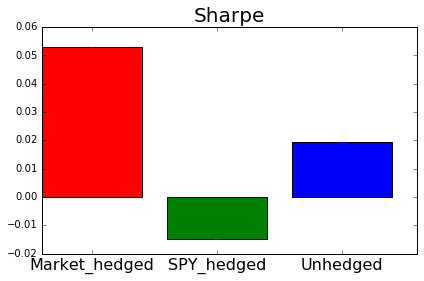

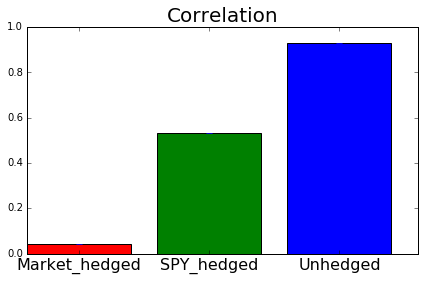

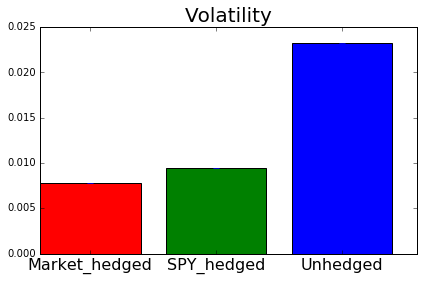

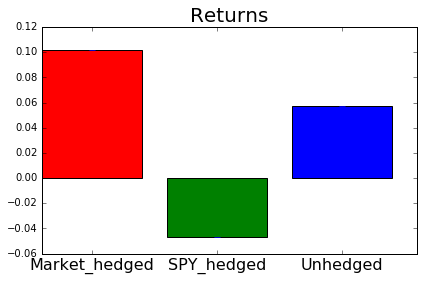

In [26]:
plot_hedge(hedge)